# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

orig_size = 1500

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=orig_size)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=orig_size)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 569


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
#from urllib.parse import quote

# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_name = city.replace(" ", "%20")
    city_url = url + f"{city_name}&appid={weather_api_key}&units=metric"

     # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

       # Append the City information into city_data list
        
        #  # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_utm = city_weather['dt']
        # city_date = time.localtime(city_utm)
        # city_date = time.strftime("%Y-%m-%d", time.localtime(city_utm))


        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_utm
                          })

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | greenville
Processing Record 2 of Set 1 | grytviken
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | ilulissat
Processing Record 5 of Set 1 | port mathurin
Processing Record 6 of Set 1 | kayangel
Processing Record 7 of Set 1 | badger
Processing Record 8 of Set 1 | olonkinbyen
Processing Record 9 of Set 1 | port elizabeth
Processing Record 10 of Set 1 | puerto natales
Processing Record 11 of Set 1 | tranovaho
City not found. Skipping...
Processing Record 12 of Set 1 | puerto ayora
Processing Record 13 of Set 1 | touros
Processing Record 14 of Set 1 | nova sintra
Processing Record 15 of Set 1 | northam
Processing Record 16 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 17 of Set 1 | aasiaat
Processing Record 18 of Set 1 | ad dilam
Processing Record 19 of Set 1 | ban houayxay
Processing Record 20 of Set 1 | metahara
Processing Record 21 of Set 1 | iqaluit
Pro

In [4]:
# Convert the cities weather data into a Pandas DataFrame

city_data_df = pd.DataFrame(city_data)
city_data_df

# Show Record Count
city_data_df.count()

City          547
Lat           547
Lng           547
Max Temp      547
Humidity      547
Cloudiness    547
Wind Speed    547
Country       547
Date          547
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,greenville,35.6127,-77.3663,11.42,88,0,7.20,US,1704868852
1,grytviken,-54.2811,-36.5092,4.71,92,77,1.70,GS,1704868853
2,adamstown,-25.0660,-130.1015,24.22,87,100,2.87,PN,1704868853
3,ilulissat,69.2167,-51.1000,6.01,49,75,5.66,GL,1704868854
4,port mathurin,-19.6833,63.4167,31.05,79,40,5.66,MU,1704868814


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,greenville,35.6127,-77.3663,11.42,88,0,7.20,US,1704868852
1,grytviken,-54.2811,-36.5092,4.71,92,77,1.70,GS,1704868853
2,adamstown,-25.0660,-130.1015,24.22,87,100,2.87,PN,1704868853
3,ilulissat,69.2167,-51.1000,6.01,49,75,5.66,GL,1704868854
4,port mathurin,-19.6833,63.4167,31.05,79,40,5.66,MU,1704868814


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [8]:
# set readable date 
utm_time = city_data_df['Date'].max()
date_readable = time.strftime("%Y-%m-%d", time.localtime(utm_time))

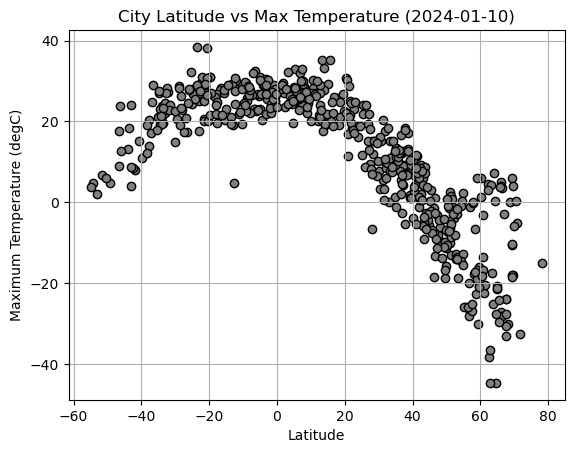

In [9]:
# Build scatter plot for latitude vs. temperature
fig, ax = plt.subplots()
pts_lat_v_temp = ax.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker='o', c='grey', edgecolors='black')

# Incorporate the other graph properties


ax.grid()
ax.set_xlabel("Latitude")
ax.set_ylabel("Maximum Temperature (degC)")
ax.set_title(f"City Latitude vs Max Temperature ({date_readable})")

# Save the figure
# plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

# store for use later
fig_temp = fig; ax_temp = ax

#### Latitude Vs. Humidity

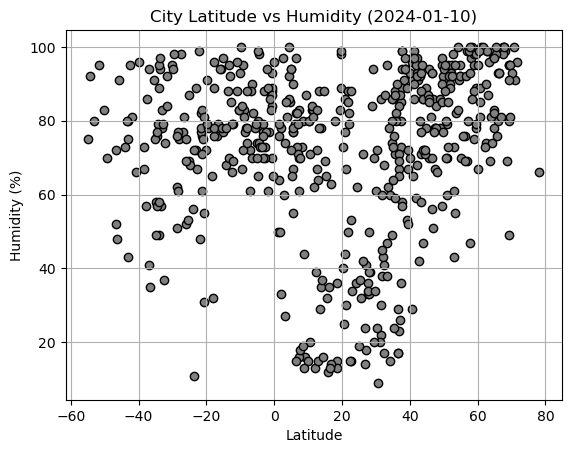

In [10]:
fig, ax = plt.subplots()


# Build the scatter plots for latitude vs. humidity
pts_lat_v_humidity = ax.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker='o', c='grey', edgecolors='black')

# Incorporate the other graph properties
ax.grid()
ax.set_xlabel("Latitude")
ax.set_ylabel("Humidity (%)")
ax.set_title(f"City Latitude vs Humidity ({date_readable})")

# Show plot
plt.show()

# Save the figure
# plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

# store for use later
fig_humid = fig; ax_humid = ax

#### Latitude Vs. Cloudiness

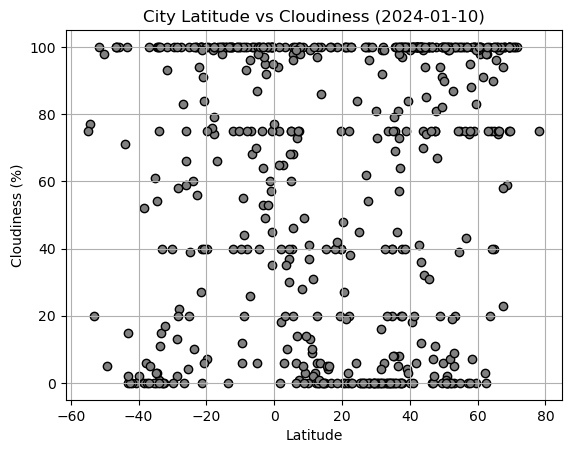

In [11]:
fig, ax = plt.subplots()

# Build the scatter plots for latitude vs. cloudiness
pts_lat_v_clouds = ax.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker='o', c='grey', edgecolors='black')

# Incorporate the other graph properties
ax.grid()
ax.set_xlabel("Latitude")
ax.set_ylabel("Cloudiness (%)")
ax.set_title(f"City Latitude vs Cloudiness ({date_readable})")

# Show plot
plt.show()

# Save the figure
# plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

# store for use later
fig_clouds = fig; ax_clouds = ax


#### Latitude vs. Wind Speed Plot

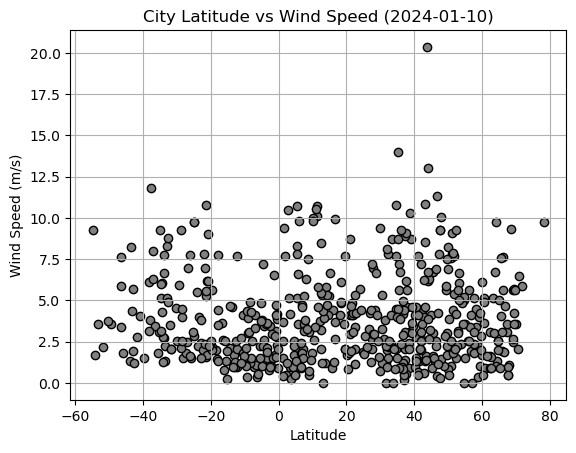

In [12]:
fig, ax = plt.subplots()

# Build the scatter plots for latitude vs. wind speed
pts_lat_v_wind = ax.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker='o', c='grey', edgecolors='black')

# Incorporate the other graph properties
ax.grid()
ax.set_xlabel("Latitude")
ax.set_ylabel("Wind Speed (m/s)")
ax.set_title(f"City Latitude vs Wind Speed ({date_readable})")

# Show plot
plt.show()

# Save the figure
# plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

# store for use later
fig_wind = fig; ax_wind = ax

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def plot_lingress(x, y, input_ax):
    model = linregress(x, y)
    slope = model.slope
    intercept = model.intercept
    r_value = model.rvalue

    x_lingress = np.arange(x.min(), x.max(), 5)
    y_lingress = x_lingress * slope + intercept
    input_ax.plot(x_lingress, y_lingress, c='red', 
                  label=f"y = {round(slope, 1)}*x + {round(intercept, 1)}\n r-value: {round(r_value, 3)}")
    input_ax.legend(fontsize=12)
    
    return r_value



In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,greenville,35.6127,-77.3663,11.42,88,0,7.20,US,1704868852
3,ilulissat,69.2167,-51.1000,6.01,49,75,5.66,GL,1704868854
5,kayangel,8.0823,134.7173,28.63,73,28,6.30,PW,1704868855
6,badger,64.8000,-147.5333,-20.81,83,40,2.57,US,1704868856
7,olonkinbyen,70.9221,-8.7187,-5.09,91,100,6.46,SJ,1704868856


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,grytviken,-54.2811,-36.5092,4.71,92,77,1.70,GS,1704868853
2,adamstown,-25.0660,-130.1015,24.22,87,100,2.87,PN,1704868853
4,port mathurin,-19.6833,63.4167,31.05,79,40,5.66,MU,1704868814
8,port elizabeth,-33.9180,25.5701,21.44,89,75,6.69,ZA,1704868857
9,puerto natales,-51.7236,-72.4875,6.77,95,100,2.20,CL,1704868858


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.878


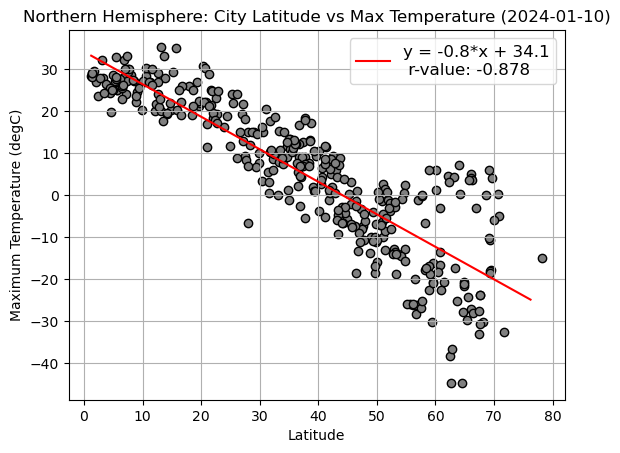

In [16]:
fig, ax = plt.subplots()

ax.scatter(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], marker='o', c='grey', edgecolors='black')

ax.grid()
ax.set_xlabel("Latitude")
ax.set_ylabel("Maximum Temperature (degC)")
ax.set_title(f"Northern Hemisphere: City Latitude vs Max Temperature ({date_readable})")

r_value = plot_lingress(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], ax)

print(f"The r-value is: {round(r_value, 3)}")
plt.show()

The r-value is: 0.603


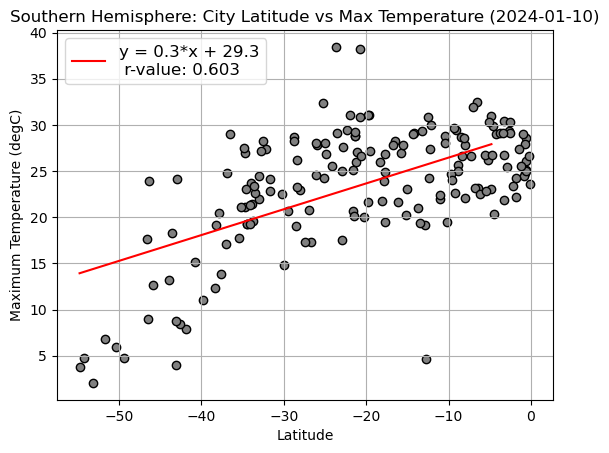

In [17]:
fig, ax = plt.subplots()

ax.scatter(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], marker='o', c='grey', edgecolors='black')

ax.grid()
ax.set_xlabel("Latitude")
ax.set_ylabel("Maximum Temperature (degC)")
ax.set_title(f"Southern Hemisphere: City Latitude vs Max Temperature ({date_readable})")

r_value = plot_lingress(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], ax)

print(f"The r-value is: {round(r_value, 3)}")
plt.show()

**Discussion about the linear relationship:** 

By dividing the temperature data into northern and southern hemisphere segments, there is a clear medium-high correlation between latitude and temperatue. 

In the southern hemisphere, there is a positive correlation i.e. the further south (decreasing latitude), the colder the maximum temperature becomes colder.

In the northern hemisphere, there is a negative correlation i.e. the further north (increasing latitude), the colder the maximum temperature becomes colder.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.423


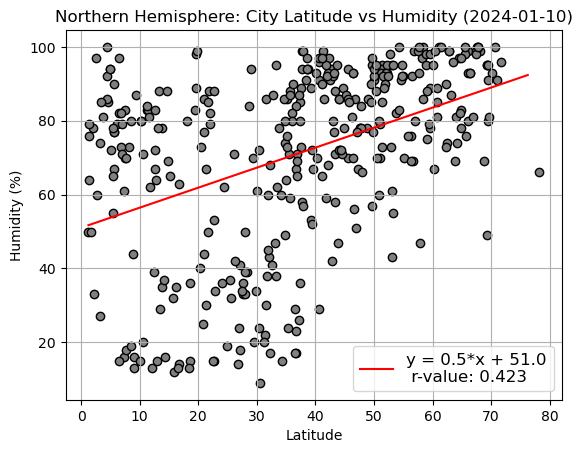

In [18]:
# Northern Hemisphere

fig, ax = plt.subplots()

ax.scatter(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], marker='o', c='grey', edgecolors='black')

ax.grid()
ax.set_xlabel("Latitude")
ax.set_ylabel("Humidity (%)")
ax.set_title(f"Northern Hemisphere: City Latitude vs Humidity ({date_readable})")

r_value = plot_lingress(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], ax)

print(f"The r-value is: {round(r_value, 3)}")
plt.show()

The r-value is: 0.178


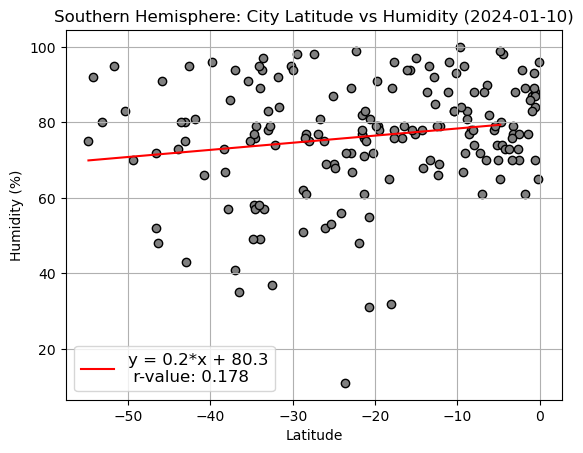

In [19]:
# Southern Hemisphere
fig, ax = plt.subplots()

ax.scatter(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], marker='o', c='grey', edgecolors='black')

ax.grid()
ax.set_xlabel("Latitude")
ax.set_ylabel("Humidity (%)")
ax.set_title(f"Southern Hemisphere: City Latitude vs Humidity ({date_readable})")

r_value = plot_lingress(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], ax)

print(f"The r-value is: {round(r_value, 3)}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.298


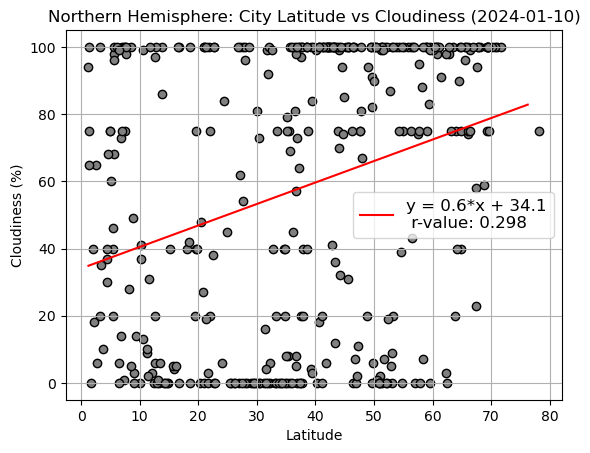

In [20]:
# Northern Hemisphere
fig, ax = plt.subplots()

ax.scatter(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], marker='o', c='grey', edgecolors='black')

ax.grid()
ax.set_xlabel("Latitude")
ax.set_ylabel("Cloudiness (%)")
ax.set_title(f"Northern Hemisphere: City Latitude vs Cloudiness ({date_readable})")

r_value = plot_lingress(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], ax)

print(f"The r-value is: {round(r_value, 3)}")
plt.show()

The r-value is: 0.351


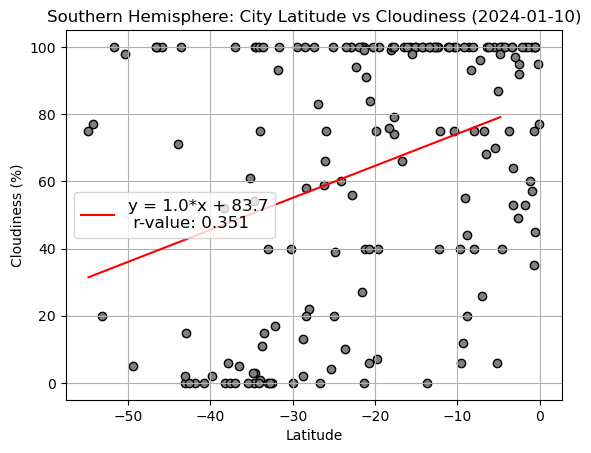

In [21]:
# Southern Hemisphere
fig, ax = plt.subplots()

ax.scatter(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], marker='o', c='grey', edgecolors='black')

ax.grid()
ax.set_xlabel("Latitude")
ax.set_ylabel("Cloudiness (%)")
ax.set_title(f"Southern Hemisphere: City Latitude vs Cloudiness ({date_readable})")

r_value = plot_lingress(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], ax)

print(f"The r-value is: {round(r_value, 3)}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.024


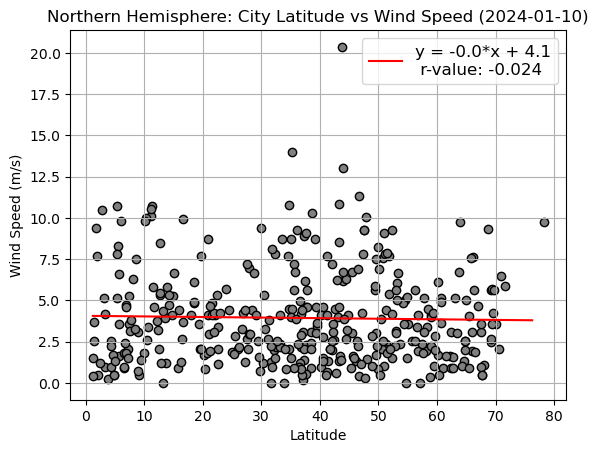

In [22]:
# Northern Hemisphere
fig, ax = plt.subplots()

ax.scatter(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], marker='o', c='grey', edgecolors='black')

ax.grid()
ax.set_xlabel("Latitude")
ax.set_ylabel("Wind Speed (m/s)")
ax.set_title(f"Northern Hemisphere: City Latitude vs Wind Speed ({date_readable})")

r_value = plot_lingress(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], ax)

print(f"The r-value is: {round(r_value, 3)}")
plt.show()

The r-value is: -0.307


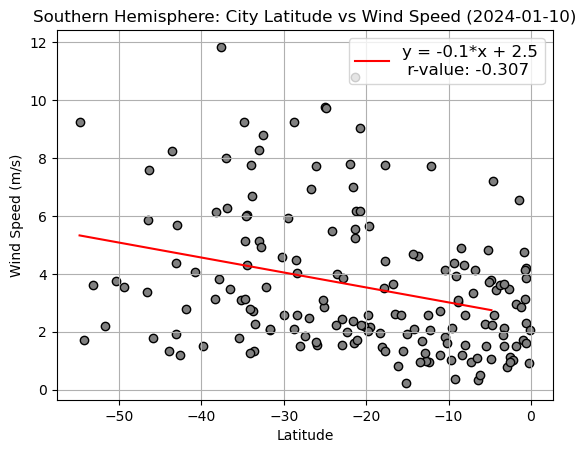

In [23]:
# Southern Hemisphere
fig, ax = plt.subplots()

ax.scatter(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], marker='o', c='grey', edgecolors='black')

ax.grid()
ax.set_xlabel("Latitude")
ax.set_ylabel("Wind Speed (m/s)")
ax.set_title(f"Southern Hemisphere: City Latitude vs Wind Speed ({date_readable})")

r_value = plot_lingress(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], ax)

print(f"The r-value is: {round(r_value, 3)}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE